
# **This notebook contains the computations and plots used to solve the assignment**


In [6]:
## 
#  This cell cleans the environment whenever is needed
#  
rm(list = ls())

In [7]:
## 
#  This cell installs the library packages used
#  Uncomment if necessary
#
# install.packages(c("readxl", "ggplot2"))

In [112]:
## 
#  This cell loads the libraries needed
#  @library readxl to read excel files
library(readxl)

In [ ]:
## 
#  This cell loads and processees the given data
#  @param data.xslx as the data time series set provided 
#  @param sheet "csv" that has the raw data
#  @return data data set cleaned and in decimals for the respective variabes
##
data                                      <- read_excel("data.xlsx", sheet = "csv")

# Changes the name of the column "Date" to "date"
names(data)[names(data) == "Date"]        <- "date"

# Transforms the date column to date format
data$date                                 <- as.Date(data$date, format = "%Y-%m-%d")

# Selects only the columns that are expressed in pertecentage and divides by 100 to get raw values
nonPercentageColumns                      <- c("date", "P/D", "P/E")
data[, !(names(data) %in% nonPercentageColumns)] <- data[, !(names(data) %in% nonPercentageColumns)] / 100

[1] "--------------------------------QUESTION 2.1--------------------------------"
[1] "The mean of the benchmark portfolio real returns is 0.0046"
[1] "The variance of the benchmark portfolio real returns is 9e-04"
[1] "The fund's relative risk aversion (gamma = mean / variance) is 5.12"

[1] "----SUMMARY IN PLOTS----"


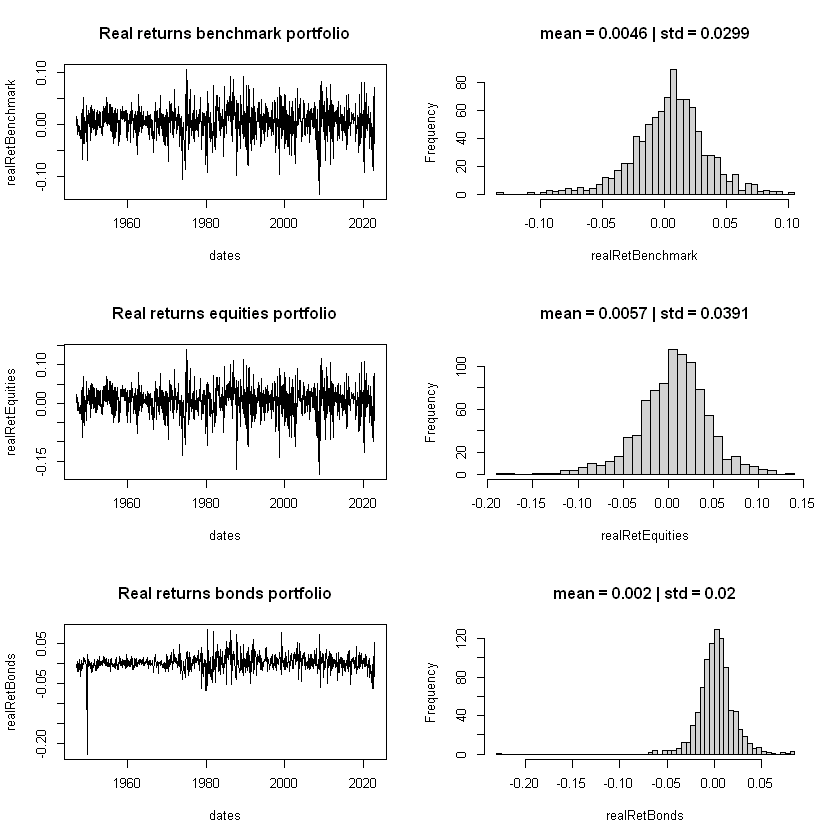

In [ ]:
## This cell solves question 2 Mean Variance-Analysis
#  @param date the time series formated date
#  @param riskFreeRate U.S. 1-month Treasury bill rate (series 3)
#  @param inflation the Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (series 37) 
#  @param equities the world equity portfolio (series 31)
#  @param bonds world government bonds portfolio (series 32)
#  @return dataMV dataset containing the principal variables used in the benchmark portfolio
##
variablesSelected <- c("date", "us_t1m", "us_infl", "wrld_eq", "wlrd_gbnd")
dataMV            <- data[, variablesSelected]
newColumnNames    <- c("date", "riskFreeRate", "inflation", "equities", "bonds")
colnames(dataMV)  <- newColumnNames

## Compute the nominal returns and real returns of the benchmark strategy
#  @param dates as the dates containing the information
#  @param nominalRetEquities the nominal returns on the equity portfolio
#  @param nominalRetBonds the nominal returns on bonds portfolio
#  @param inflation the CPI used to get real returns
#  @param weightInEquities the strategy weight in equities
#  @param weightInBonds the strategy's weight in bonds
#  @return nominalRetBenchmark as the nominal return considering the weights
#  @return realRetBenhmark as the real return adjusted to inflation
#
dates               <- dataMV$date[-1]
nominalRetEquities  <- dataMV$equities[-1]
nominalRetBonds     <- dataMV$bonds[-1]
inflation           <- dataMV$inflation[-1]
weightInEquities    <- 0.70
weightInBonds       <- 0.30
nominalRetBenchmark <- weightInEquities*nominalRetEquities + weightInBonds*nominalRetBonds
realRetBenchmark    <- (1 + nominalRetBenchmark) / (1 + inflation) - 1

## Infer the fund’s relative risk aversion,assume real returns and no risk-free asset
#  Weight in risky assets is 100% in this case
#  @param realRetBenchmark the real returns of the strategy
#  @return meanBenchmark of the real returns of the benchmark portfolio
#  @return varBenchmark of the real returns of the benchmark portfolio
#  @return gammaBenchmark as solving for relative risk aversion
#
meanBenchmark     <- mean(realRetBenchmark)
varBenchmark      <- var(realRetBenchmark)
stdBenchmark      <- sd(realRetBenchmark)
weightRiskyAssets <- 1
gammaBenchmark    <- 1/weightRiskyAssets * meanBenchmark/varBenchmark 
print("--------------------------------QUESTION 2.1--------------------------------")
print(paste("The mean of the benchmark portfolio real returns is", round(meanBenchmark,4)))
print(paste("The variance of the benchmark portfolio real returns is", round(varBenchmark,4)))
print(paste("The fund's relative risk aversion (gamma = mean / variance) is", round(gammaBenchmark, 2)))

## Make reference of the two momments of the two assets vs portfolio
#  Use real returns
#  @param inflation to compute real returns
#  @param nominalRetEquities
#  @param nominalRetBonds
#  @param realRetBenchmark
#  @return meanEquities adjusted to inflation
#  @return meanBonds adjusted to inflation
#  @return varEquities adjusted to inflation
#  @return varBonds
#  @return plot with historgrams of realRetEquities + realRetBonds and realRetBenchmark
realRetEquities <- (1 + nominalRetEquities) / (1 + inflation) - 1
realRetBonds    <- (1 + nominalRetBonds)    / (1 + inflation) - 1
meanEquities    <- mean(realRetEquities)
meanBonds       <- mean(realRetBonds)
varEquities     <- var(realRetEquities)
varBonds        <- var(realRetBonds)
stdEquities     <- sd(realRetEquities)
stdBonds        <- sd(realRetBonds)

# Set titles
cat("\n")
print("----SUMMARY IN PLOTS----")
par(mfrow = c(3, 2))
t1a <- paste("Real returns benchmark portfolio")
t1b <- paste("mean =", round(meanBenchmark, 4), "| std =", round(stdBenchmark, 4))
t2a <- paste("Real returns equities portfolio")
t2b <- paste("mean =", round(meanEquities, 4), "| std =", round(stdEquities, 4))
t3a <- paste("Real returns bonds portfolio")
t3b <- paste("mean =", round(meanBonds, 4), "| std =", round(stdBonds, 4))

# Plot benchmark
plot(dates, realRetBenchmark, type = "l", main = t1a)
hist(realRetBenchmark, breaks = 45, main = t1b)

# Plot Equities
plot(dates, realRetEquities, type = "l", main = t2a)
hist(realRetEquities, breaks = 45, main = t2b)

# Plot Bonds
plot(dates, realRetBonds, type = "l", main = t3a)
hist(realRetBonds, breaks = 45, main = t3b)